In [2]:
import tensorflow as tf
from src.gan2 import MusicGAN
from src.music_dataset import MusicDataset
from torch.utils.data.sampler import RandomSampler
from torch.utils.data import DataLoader
batch_size = 100
data = MusicDataset('../MusicMats/')
sampler = DataLoader(data, batch_size=batch_size, sampler=RandomSampler(data, True, batch_size))
gan = MusicGAN('./src/training_checkpoints', './output/', batch_size)

No checkpoint loaded


In [3]:
gan.train(sampler, 10)

Training discrminator, generator
Time for epoch 1 is 3.8578319549560547 sec
Average real prediction: 0.505528450012207, Average fake prediction: 0.49698418378829956
Training generator
Time for epoch 2 is 2.5114099979400635 sec
Average real prediction: 0.49981141090393066, Average fake prediction: 0.49598485231399536
Training generator
Time for epoch 3 is 2.510998010635376 sec
Average real prediction: 0.493257075548172, Average fake prediction: 0.4961344003677368
Training generator
Time for epoch 4 is 2.5106520652770996 sec
Average real prediction: 0.48775288462638855, Average fake prediction: 0.495674729347229
Training generator
Time for epoch 5 is 2.5040640830993652 sec
Average real prediction: 0.5056206583976746, Average fake prediction: 0.4950445592403412
Training generator
Time for epoch 6 is 2.594413995742798 sec
Average real prediction: 0.41863715648651123, Average fake prediction: 0.49625611305236816
Training generator
Time for epoch 7 is 2.549715042114258 sec
Average real predi

In [4]:
gan.train(sampler,90)


Training generator
Time for epoch 11 is 2.554527997970581 sec
Average real prediction: 0.47201085090637207, Average fake prediction: 0.49520331621170044
Training generator
Time for epoch 12 is 2.512295961380005 sec
Average real prediction: 0.47582390904426575, Average fake prediction: 0.4955516457557678
Training generator
Time for epoch 13 is 2.381105899810791 sec
Average real prediction: 0.4814189672470093, Average fake prediction: 0.49520397186279297
Training generator
Time for epoch 14 is 2.4681618213653564 sec
Average real prediction: 0.44365987181663513, Average fake prediction: 0.49789959192276
Training generator
Time for epoch 15 is 2.389625072479248 sec
Average real prediction: 0.49391135573387146, Average fake prediction: 0.49645957350730896
Training generator
Time for epoch 16 is 2.4936490058898926 sec
Average real prediction: 0.5208200812339783, Average fake prediction: 0.4960140585899353
Training generator
Time for epoch 17 is 2.4939041137695312 sec
Average real prediction:

Time for epoch 65 is 2.4796316623687744 sec
Average real prediction: 0.5041734576225281, Average fake prediction: 0.4971965551376343
Training generator
Time for epoch 66 is 2.477200746536255 sec
Average real prediction: 0.4236048460006714, Average fake prediction: 0.49882790446281433
Training generator
Time for epoch 67 is 2.5304031372070312 sec
Average real prediction: 0.4870617389678955, Average fake prediction: 0.4964011311531067
Training generator
Time for epoch 68 is 2.4237887859344482 sec
Average real prediction: 0.4695546627044678, Average fake prediction: 0.4947656989097595
Training generator
Time for epoch 69 is 2.4464190006256104 sec
Average real prediction: 0.4640733301639557, Average fake prediction: 0.49809154868125916
Training generator
Time for epoch 70 is 2.4963951110839844 sec
Average real prediction: 0.45324933528900146, Average fake prediction: 0.4978295564651489
Training generator
Time for epoch 71 is 2.446652889251709 sec
Average real prediction: 0.4635452628135681

In [6]:
gan.generate_npz('./output/4.npz')
gan.predict_from_npz('./output/4.npz').numpy()

(384, 128)


array([[0.50058913]], dtype=float32)

In [1]:
import pypianoroll
from src.midi_utils import ndarray_to_midi
sample = pypianoroll.load('../MusicMats/alb_se1_format0_sample_3.npz')
ndarray_to_midi(sample.tracks[0].pianoroll, './output/sample_1.mid')
gan.predict_from_midi('./output/sample_1.mid').numpy()[0, 0]

NameError: name 'gan' is not defined

In [ ]:
import pypianoroll
roll = pypianoroll.load('./output/4.npz')
pypianoroll.plot(roll)

(<Figure size 432x288 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x143e2a4e0>])

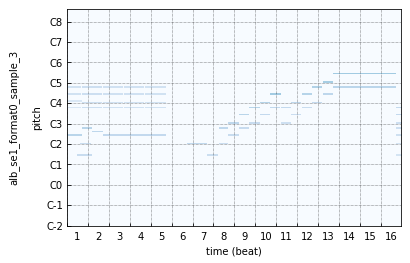

In [7]:
sample = pypianoroll.load('../MusicMats/alb_se1_format0_sample_3.npz')
pypianoroll.plot(sample)

In [10]:
sample.tracks[0].pianoroll.max()

46

In [15]:
import pypianoroll
roll = pypianoroll.load('./output/4.npz')
roll.tracks[0].pianoroll.max()

0.03690301

In [9]:
sample = pypianoroll.load('../MusicMats/alb_se1_format0_sample_3.npz')
sample.tracks[0].pianoroll.max()

127

127

(<Figure size 432x288 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x140e61550>])

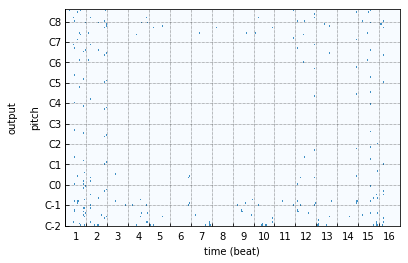

In [10]:
%matplotlib inline
import pypianoroll
roll = pypianoroll.parse('vm_out/07_32_epoch_250.mid')
roll.tracks[0].pianoroll[roll.tracks[0].pianoroll > 0] = 80
pypianoroll.plot(roll)


In [17]:
import src.midi_utils
src.midi_utils.npz_to_midi('./output/4.npz', 'vm_out/')

In [3]:
gan.generate_midi('./vm_out/4.mid')

(384, 128)


In [29]:
import tensorflow as tf
noise = tf.random.normal([1, 100])
gen = gan.generator(noise)


In [30]:
import numpy as np
gen = np.reshape(gen , (384, 128))

In [33]:
print(gen.max())
print(gen.min())

0.09207781
0.0


In [34]:
gen = (gen) * 63.5

In [35]:
gen.max()

5.8469405

In [28]:
gen.min()

63.5

In [23]:
from src.midi_utils import ndarray_to_midi
ndarray_to_midi(gen.astype('uint8'), './rob_out3/scaled1.mid')

(<Figure size 432x288 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x14767ae48>])

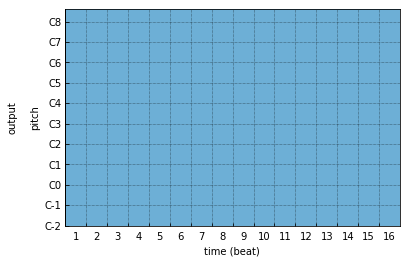

In [26]:
import pypianoroll
roll = pypianoroll.parse('./output/scaled1.mid')
pypianoroll.plot(roll)

0
63
[[63 63 63 ... 63 63 63]
 [63 63 63 ... 63 63 63]
 [63 63 63 ... 63 63 63]
 ...
 [63 63 63 ... 63 63 63]
 [63 63 63 ... 63 63 63]
 [63 63 63 ... 63 63 63]]


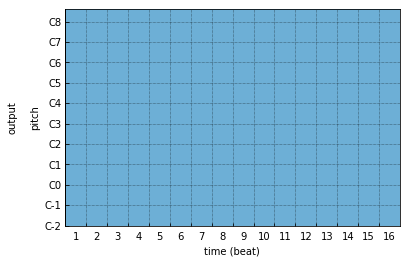

In [26]:
import pypianoroll
roll = pypianoroll.parse('rob_out3/2019_05_19_21_29_epoch_50.mid')
pypianoroll.plot(roll)
mat = roll.tracks[0].pianoroll
print(len(mat[mat < 0]))
print(mat.max())
print(mat)